## Bike Sharing Assignment

A US bike-sharing provider **BoomBikes** has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.
In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all-around and stand out from other service providers and make huge profits
They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:
- **Which variables are significant in predicting the demand for shared bikes.**
- How well those variables describe the bike demands.

## Business Goal:
You are required to **model the demand** for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.

## Approach:
We will use **multi Linear regression** model to analyse which variables are significant in predicting the demand for shared bikes.

## Steps for Multi Linear Regression (MLR):
- Step 1: Reading and Understanding the Data
- Step 2: Data Preparation & Visualising the Data
- Step 3: Splitting the Data into Training and Testing Sets
- Step 4: Building a linear model
- Step 5: Refine the model (if required)
- Step 6: Residual Analysis and Making Predictions Using the Final Model
- Step 7: Model Evaluation
- Step 8: Business Model Equation



### Step 1: Reading and Understanding the Data

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('day.csv')

# Display basic information and the first few rows
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### Observation
The dataset consists of 730 rows and 16 columns
- The target variable (cnt) represents the total number of bike rentals.
- The dataset includes numerical and categorical features such as
- Date (dteday): Object type, may need conversion.
- Season (season), Year (yr), Month (mnth), Holiday (holiday), Weekday (weekday), Working day (workingday), and Weather situation (weathersit): These are categorical or ordinal features.
- Temperature (temp), Feels-like temperature (atemp), Humidity (hum), and Windspeed (windspeed): These are continuous features.
- Casual (casual) and Registered (registered): These sum up to cnt but might not be used in regression directly.

In [2]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

Series([], dtype: int64)

There are no missing values in the dataset—all columns have complete data

In [3]:
# Check for duplicate rows
duplicate_rows = df.duplicated().sum()
duplicate_rows

0

There are no duplicate rows in the dataset. All records are unique.

### Step 2: Data Preparation & Visualising the Data

In [4]:
# Drop unnecessary columns
df_cleaned = df.drop(columns=['instant', 'dteday', 'casual', 'registered'])

# Display the updated dataframe information
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


#### Observations:
- The dataset now contains 12 columns, with 'cnt' as the target variable.
- All remaining columns are numerical.
- No missing values exist in the cleaned dataset.

In [5]:
# Define mapping for categorical columns
mapping = {
    'season': {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'},
    'mnth': {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 
             7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'},
    'weathersit': {1: 'Clear', 2: 'Mist/Cloudy', 3: 'Light Rain/Snow', 4: 'Heavy Rain/Snow'},
    'weekday': {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 
                4: 'Thursday', 5: 'Friday', 6: 'Saturday'}
}

# Display mappings
mapping

{'season': {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'},
 'mnth': {1: 'Jan',
  2: 'Feb',
  3: 'Mar',
  4: 'Apr',
  5: 'May',
  6: 'Jun',
  7: 'Jul',
  8: 'Aug',
  9: 'Sep',
  10: 'Oct',
  11: 'Nov',
  12: 'Dec'},
 'weathersit': {1: 'Clear',
  2: 'Mist/Cloudy',
  3: 'Light Rain/Snow',
  4: 'Heavy Rain/Snow'},
 'weekday': {0: 'Sunday',
  1: 'Monday',
  2: 'Tuesday',
  3: 'Wednesday',
  4: 'Thursday',
  5: 'Friday',
  6: 'Saturday'}}

In [6]:
# Apply the mapping to the dataset
df_mapped = df_cleaned.copy()
for col, map_dict in mapping.items():
    df_mapped[col] = df_mapped[col].map(map_dict)

# Display the first few rows of the updated dataset
df_mapped.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Monday,1,Mist/Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Tuesday,1,Mist/Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Thursday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


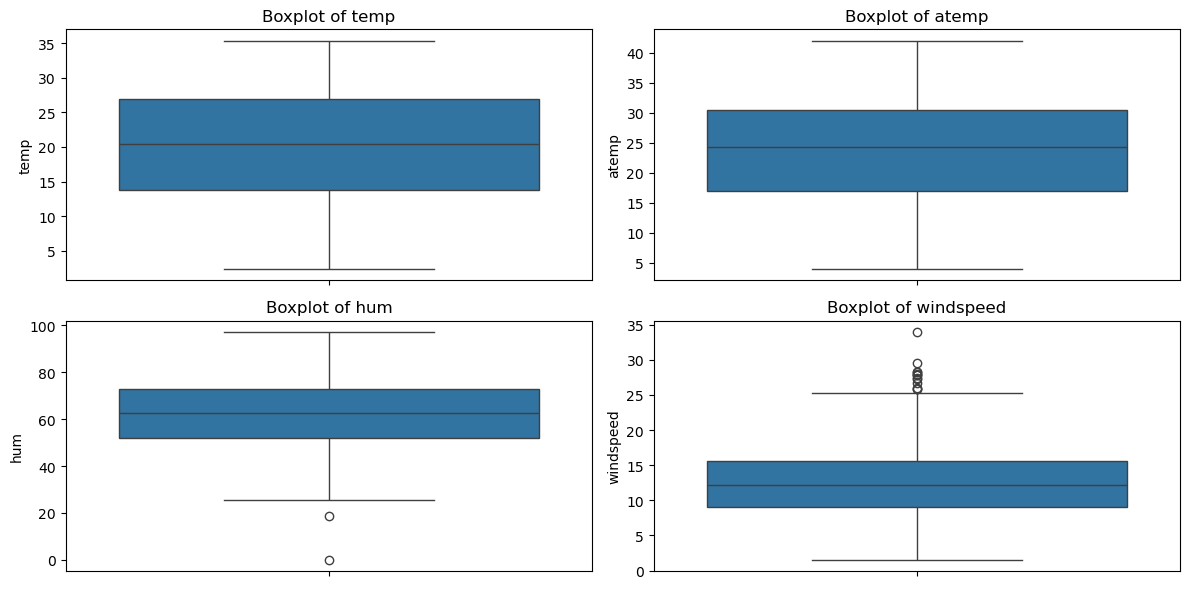

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define numerical columns to inspect for outliers
numerical_cols = ['temp', 'atemp', 'hum', 'windspeed']

# Set up the figure and axes for boxplots
plt.figure(figsize=(12, 6))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=df_mapped[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

#### Observations
- Temperature (temp) and Feels-like Temperature (atemp): No significant outliers are visible. The data appears to be well-distributed.
- Humidity (hum): A few potential outliers are present on the lower side (near 0), indicating days with extremely low humidity.
- Windspeed (windspeed): Some outliers are seen in the higher range, suggesting unusually windy days.

In [8]:
# Function to calculate IQR and detect outliers
def iqr_outlier_analysis(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return {
        'Column': column,
        'Q1': Q1,
        'Q3': Q3,
        'IQR': IQR,
        'Lower Bound': lower_bound,
        'Upper Bound': upper_bound,
        'Outlier Count': len(outliers)
    }

# Perform IQR analysis on selected numerical columns
outlier_summary = pd.DataFrame([iqr_outlier_analysis(df_mapped, col) for col in numerical_cols])

# Display the outlier summary
outlier_summary

,Column,Q1,Q3,IQR,Lower Bound,Upper Bound,Outlier Count
0,temp,13.811885,26.880615,13.068729,-5.791209,46.483709,0
1,atemp,16.889713,30.445775,13.556062,-3.444381,50.779869,0
2,hum,52.000000,72.989575,20.989575,20.515637,104.473938,2
3,windspeed,9.041650,15.625589,6.583939,-0.834259,25.501498,13


#### Observations
- Humidity (hum): 2 outliers were found below the lower bound. These represent days with unusually low humidity.
- Windspeed (windspeed): 13 outliers were found above the upper bound. These indicate exceptionally windy days.

In [9]:
# Remove outliers based on IQR for 'hum' and 'windspeed'
df_fixed = df_mapped[
    (df_mapped['hum'] >= outlier_summary[outlier_summary['Column'] == 'hum']['Lower Bound'].values[0]) &
    (df_mapped['hum'] <= outlier_summary[outlier_summary['Column'] == 'hum']['Upper Bound'].values[0]) &
    (df_mapped['windspeed'] >= outlier_summary[outlier_summary['Column'] == 'windspeed']['Lower Bound'].values[0]) &
    (df_mapped['windspeed'] <= outlier_summary[outlier_summary['Column'] == 'windspeed']['Upper Bound'].values[0])
]

# Display the number of rows before and after removing outliers
original_count = df_mapped.shape[0]
new_count = df_fixed.shape[0]

{
    "Original Row Count": original_count,
    "New Row Count": new_count,
    "Rows Removed": original_count - new_count
}


{'Original Row Count': 730, 'New Row Count': 716, 'Rows Removed': 14}

#### Observations
- 14 rows were removed from the dataset based on the IQR method. 2 rows with extremely low humidity and 12 rows with exceptionally high windspeed.
- The dataset now contains 716 rows

### Lets do univariate analysis

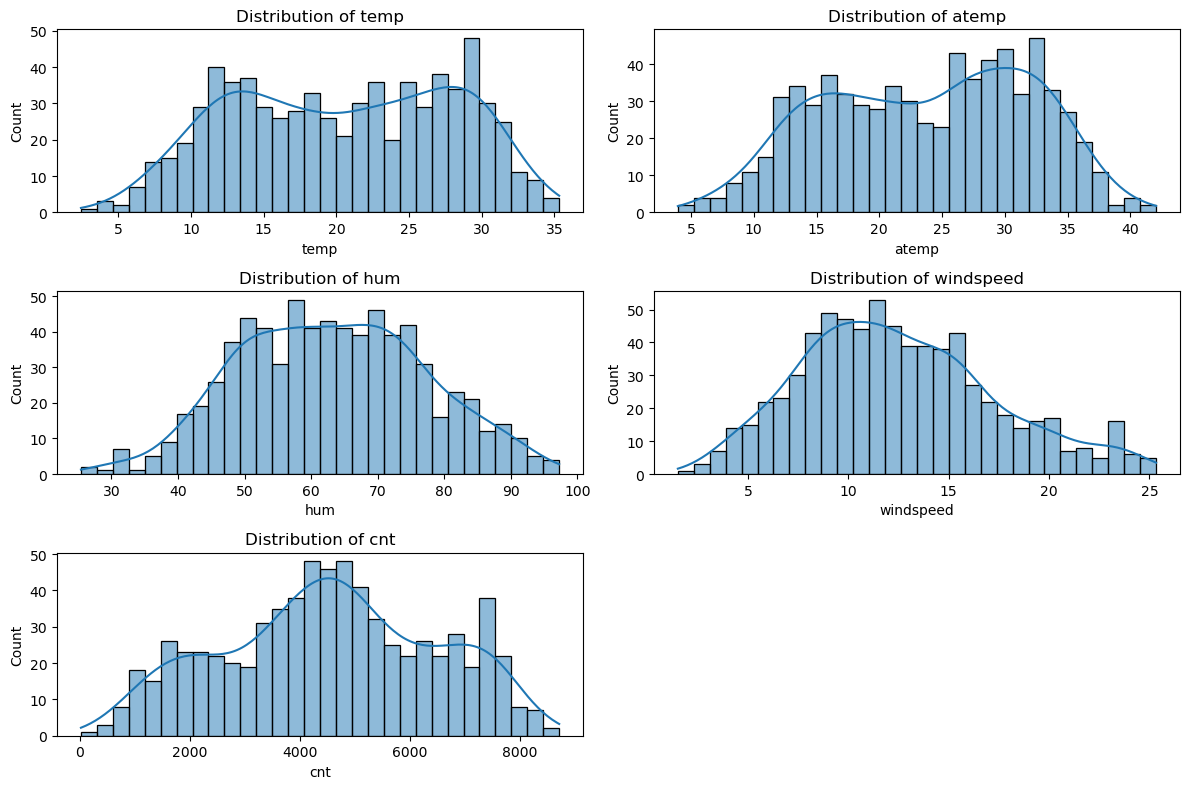

In [10]:
# Set up the figure for univariate visualizations
plt.figure(figsize=(12, 8))

# Define numerical columns for visualization
univariate_cols = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

# Plot histograms for each column
for i, col in enumerate(univariate_cols, 1):
    plt.subplot(3, 2, i)
    sns.histplot(df_fixed[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

#### Observations
- Temperature (temp) and Feels-like Temperature (atemp):are approximately normal, slightly skewed to the left.
- Humidity (hum): Slightly right-skewed, meaning more days have high humidity.
- Windspeed (windspeed): Right-skewed distribution with most values concentrated in the lower range.
- Bike Rentals (cnt): Right-skewed distribution, meaning there are more days with low-to-moderate rentals.

### Lets create scatterplots to visualize relationships with target variable 'cnt'

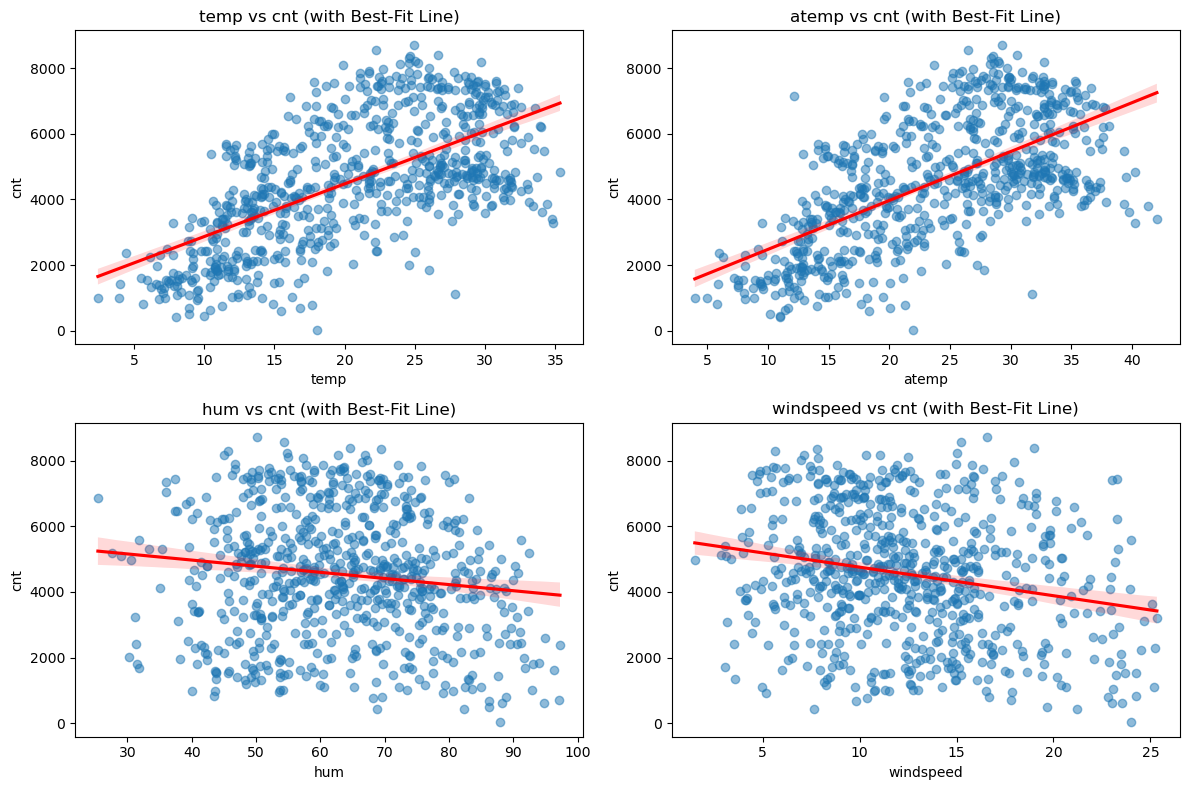

In [11]:
# Set up the figure for scatterplots with best-fit lines
plt.figure(figsize=(12, 8))

# Plot scatterplots with regression lines
for i, col in enumerate(univariate_cols[:-1], 1):  # Excluding 'cnt' itself
    plt.subplot(2, 2, i)
    sns.regplot(x=df_fixed[col], y=df_fixed['cnt'], scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
    plt.title(f'{col} vs cnt (with Best-Fit Line)')

plt.tight_layout()
plt.show()


#### Observations
- Temperature (temp) & Feels-like Temperature (atemp): Strong positive correlation with bike rentals.
- Humidity (hum) vs. Bike Rentals (cnt): Slight negative correlation with rentals. Higher humidity levels seem to slightly reduce bike rentals.
- Windspeed (windspeed) vs. Bike Rentals (cnt): No clear correlation: Rentals are fairly spread out across different windspeed values

### lets Analyse/visualize the categorical columns to see how predictor variable stands against the target variable

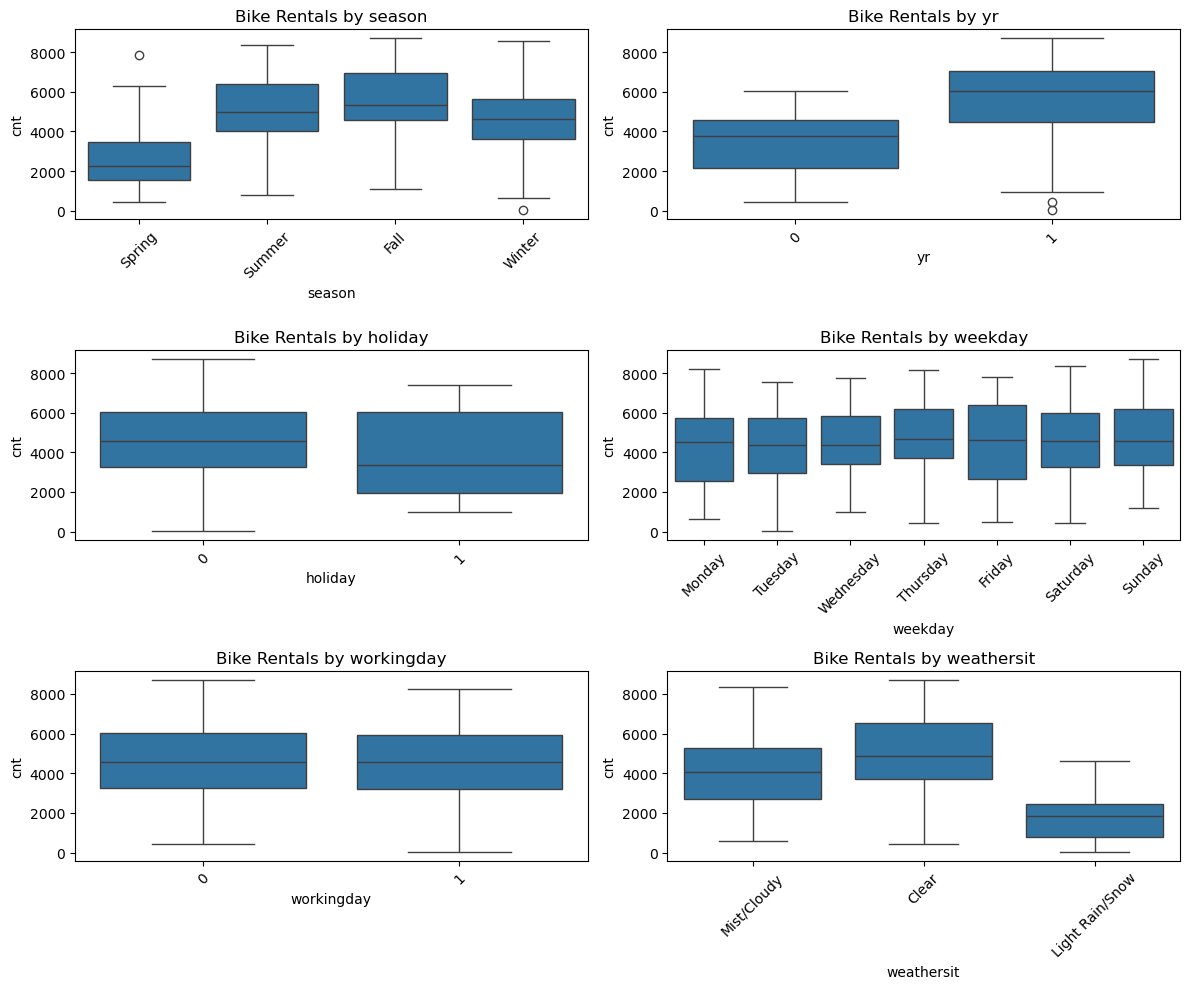

In [12]:
# Set up the figure for categorical analysis
plt.figure(figsize=(12, 10))

# Define categorical columns
categorical_cols = ['season', 'yr', 'holiday', 'weekday', 'workingday', 'weathersit']

# Create boxplots to visualize distributions of 'cnt' across categorical variables
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x=df_fixed[col], y=df_fixed['cnt'])
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.title(f'Bike Rentals by {col}')

plt.tight_layout()
plt.show()

#### Observations
- Season (season) vs. Bike Rentals (cnt): Fall has the highest median rentals, followed by Summer. Spring has the lowest rentals, possibly due to unpredictable weather.
- Year (yr) vs. Bike Rentals (cnt): The second year (1) has noticeably higher rentals than the first year (0). This suggests an increasing trend in bike usage over time.
- Holiday (holiday) vs. Bike Rentals (cnt): Non-holiday days have higher rentals than holidays. This may indicate that most rentals are for commuting rather than leisure.
- Weekday (weekday) vs. Bike Rentals (cnt): Rentals are relatively consistent across weekdays, with slight dips on weekends. This reinforces the idea that bikes are used for work-related commutes.
- Working Day (workingday) vs. Bike Rentals (cnt): Higher rentals on working days, confirming that the majority of users are likely commuters.
- Weather Situation (weathersit) vs. Bike Rentals (cnt): Clear weather has the highest rentals, while heavy rain/snow conditions significantly reduce rentals. Bad weather is a major factor in bike usage.                                                                                                                                                            
                                                                                                                                                                         
                                                                                                                                                                         

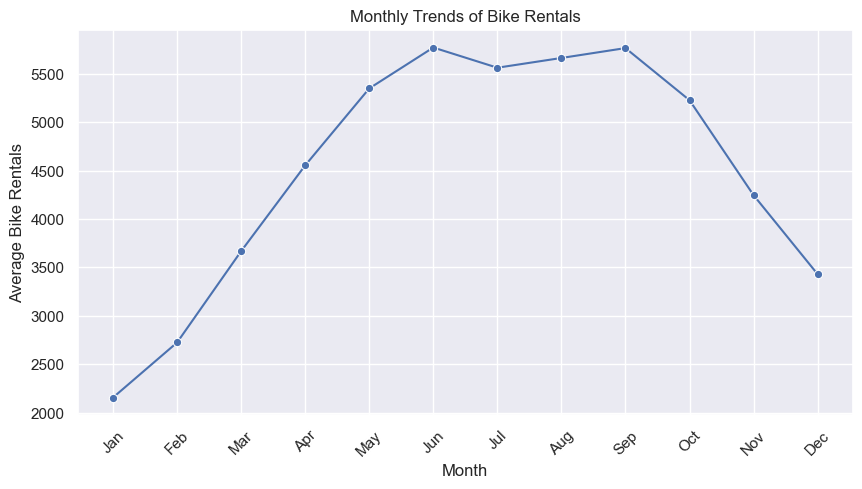

In [13]:
sns.set()
# Set up the figure for the line plot
plt.figure(figsize=(10, 5))

# Plot monthly trends of 'cnt'
sns.lineplot(x=df_fixed['mnth'], y=df_fixed['cnt'], estimator='mean', errorbar=None, marker='o')

# Customize the plot
plt.title('Monthly Trends of Bike Rentals')
plt.xlabel('Month')
plt.ylabel('Average Bike Rentals')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.show()

#### Observation
- Rentals increase from spring (March) and peak in summer (June to September). This suggests more people use bikes in warm and comfortable weather.
- A sharp drop in bike rentals from October to February. This could be due to colder temperatures, shorter daylight hours, and unfavorable weather.
- The trend aligns with the earlier boxplot analysis, where fall and summer had the highest rentals, while winter had the lowest.

### Let's draw the heat map to analyse the correlation

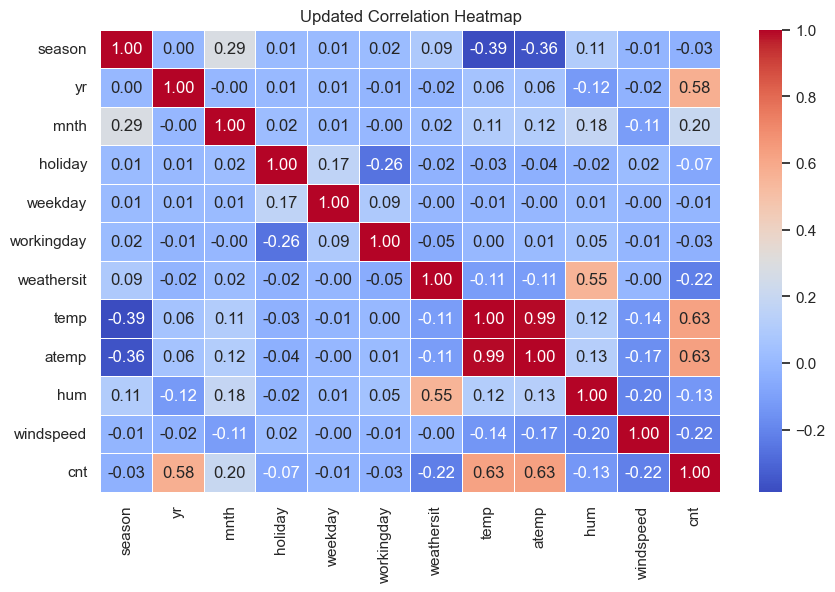

In [14]:
# Encode all categorical columns
df_encoded = df_fixed.copy()

# Convert categorical columns to numeric codes
for col in categorical_cols + ['mnth']:
    df_encoded[col] = df_encoded[col].astype('category').cat.codes

# Compute the correlation matrix
corr_matrix_fixed = df_encoded.corr()

# Plot the heatmap again
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix_fixed, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Updated Correlation Heatmap")
plt.show()


#### Observation
- Temperature and time-related factors (year, month, season) are the most important predictors of bike rentals.
- Bad weather (rain, snow, humidity) has a negative effect on rentals.
- Windspeed, weekday, and holidays have minimal influence.

#### Drop atemp as atemp and temp are almost identical, meaning they provide redundant information.

In [15]:
# Drop 'atemp' from the dataset
df_final = df_encoded.drop(columns=['atemp'])

# Display the updated column list after dropping 'atemp'
df_final.columns


Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

#### Observations
- The dataset now has 10 predictor variables instead of 11.

### Let's do One-Hot Encoding to categorical variables

In [16]:
# Apply One-Hot Encoding to specified categorical variables
categorical_to_encode = ['season', 'weathersit', 'mnth', 'weekday']
df_encoded_final = pd.get_dummies(df_final, columns=categorical_to_encode, drop_first=True)  # Drop first to avoid dummy variable trap

# Display the updated column list after encoding
df_encoded_final.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'season_1', 'season_2', 'season_3', 'weathersit_1', 'weathersit_2',
       'mnth_1', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7',
       'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11', 'weekday_1', 'weekday_2',
       'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6'],
      dtype='object')

#### Observations
- The dataset now has more independent variables due to encoding, allowing the model to capture categorical effects.

### Step 3: Splitting the Data into Training and Testing Sets

### Split dataset into 80% training and 20% testing

In [17]:
from sklearn.model_selection import train_test_split

# Define independent variables (X) and target variable (y)
X = df_encoded_final.drop(columns=['cnt'])  # Features
y = df_encoded_final['cnt']  # Target variable

# Split the dataset (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the sizes of the training and testing sets
{
    "Training Set Size": X_train.shape[0],
    "Testing Set Size": X_test.shape[0],
    "Total Rows": df_encoded_final.shape[0]
}


{'Training Set Size': 572, 'Testing Set Size': 144, 'Total Rows': 716}

#### Observations
- 572 rows assigned to the training set. 144 rows assigned to the testing set.

### Let's go for scaling of numerical features

In [18]:
df_encoded_final.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_1,season_2,season_3,...,mnth_8,mnth_9,mnth_10,mnth_11,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,0,1,14.110847,80.5833,10.749882,985,True,False,False,...,False,False,False,False,True,False,False,False,False,False
1,0,0,1,14.902598,69.6087,16.652113,801,True,False,False,...,False,False,False,False,False,False,False,False,True,False
2,0,0,1,8.050924,43.7273,16.636703,1349,True,False,False,...,False,False,False,False,False,False,False,False,False,True
3,0,0,1,8.200000,59.0435,10.739832,1562,True,False,False,...,False,False,False,False,False,False,False,True,False,False
4,0,0,1,9.305237,43.6957,12.522300,1600,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [19]:
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Define numerical columns to scale
numerical_cols = ['temp', 'hum', 'windspeed']

# Apply MinMax Scaling only to numerical columns in X_train and X_test
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

# Display summary statistics after scaling
X_train[numerical_cols].describe()

,temp,hum,windspeed
count,572.000000,572.000000,572.000000
mean,0.552183,0.519969,0.461276
std,0.228240,0.189825,0.204564
min,0.000000,0.000000,0.000000
25%,0.353871,0.372244,0.312955
50%,0.565959,0.515661,0.436209
75%,0.746117,0.661398,0.585878
max,1.000000,1.000000,1.000000


#### Observations
- The minimum is 0 and maximum is 1 for each scaled column (temp, hum, windspeed).

### Step 4: Building a linear model

### Define Features and Target Variable

In [20]:
# Define the feature matrix (X) and target variable (y)
X = df_encoded_final.drop(columns=['cnt'])  # Features (independent variables)
y = df_encoded_final['cnt']  # Target variable (dependent variable)

# Display the shapes of X and y to confirm
X.shape, y.shape

((716, 28), (716,))

In [21]:
# Create a DataFrame to compare column names of training and testing sets
column_comparison = pd.DataFrame({'Training Set Columns': X_train.columns, 'Testing Set Columns': X_test.columns})

# Display the table
column_comparison


,Training Set Columns,Testing Set Columns
0,yr,yr
1,holiday,holiday
2,workingday,workingday
3,temp,temp
4,hum,hum
5,windspeed,windspeed
6,season_1,season_1
7,season_2,season_2
8,season_3,season_3
9,weathersit_1,weathersit_1


### perform Recursive Feature Elimination (RFE) and get the top 15 features

In [22]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Initialize the Linear Regression model
model = LinearRegression()

# Initialize Recursive Feature Elimination (RFE) to select top 15 features
rfe = RFE(estimator=model, n_features_to_select=15)
rfe.fit(X_train, y_train)

# Get selected feature names
selected_features = X_train.columns[rfe.support_]

# Display the selected features
print("Selected Features:", selected_features)


Selected Features: Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_1', 'season_3',
       'weathersit_1', 'weathersit_2', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5',
       'mnth_9', 'mnth_11'],
      dtype='object')


In [23]:
# Create new DataFrames with only the selected RFE features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Display the first few rows of the updated training set to verify
print(X_train_selected.head())


     yr  holiday      temp       hum  windspeed  season_1  season_3  \
58    0        0  0.433803  0.866168   0.751426      True     False   
209   0        0  0.970925  0.401392   0.426594     False     False   
325   0        0  0.445508  0.986079   0.271003     False      True   
541   1        0  0.712370  0.165892   0.914353     False     False   
24    0        0  0.204785  0.505044   0.301938      True     False   

     weathersit_1  weathersit_2  mnth_2  mnth_3  mnth_4  mnth_5  mnth_9  \
58          False          True   False    True   False   False   False   
209         False         False   False   False   False    True   False   
325          True         False   False   False   False   False    True   
541         False         False   False   False   False   False   False   
24          False          True   False   False    True   False   False   

     mnth_11  
58     False  
209    False  
325    False  
541    False  
24     False  


In [24]:
import statsmodels.api as sm

# Ensure all features are float
X_train_selected = X_train_selected.astype(float)
X_test_selected = X_test_selected.astype(float)

# Add a constant for the intercept
X_train_ols = sm.add_constant(X_train_selected)

# Fit the OLS model
ols_model = sm.OLS(y_train, X_train_ols).fit()

# Display the summary
print(ols_model.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     197.1
Date:                Tue, 25 Feb 2025   Prob (F-statistic):          4.26e-211
Time:                        21:56:20   Log-Likelihood:                -4611.7
No. Observations:                 572   AIC:                             9255.
Df Residuals:                     556   BIC:                             9325.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         3011.5057    232.714     12.941   

In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Function to calculate and sort VIF scores (including intercept)
def calculate_vif(df):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = df.columns
    vif_data["VIF Score"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    
    # Sort by VIF score in descending order
    vif_data = vif_data.sort_values(by="VIF Score", ascending=False)
    return vif_data

# Compute VIF scores (including 'const')
X_train_vif = sm.add_constant(X_train_selected)  # Add intercept
vif_scores = calculate_vif(X_train_vif)  # Keep 'const'

# Display sorted VIF scores including 'const'
print(vif_scores)

         Feature  VIF Score
0          const  51.079536
6       season_1   3.855154
3           temp   3.845247
12        mnth_4   2.403296
7       season_3   2.244105
4            hum   2.058562
11        mnth_3   2.026733
14        mnth_9   1.772480
9   weathersit_2   1.650909
10        mnth_2   1.583648
13        mnth_5   1.430029
8   weathersit_1   1.397140
5      windspeed   1.199046
15       mnth_11   1.123952
1             yr   1.031596
2        holiday   1.019744


#### Observation
- mnth_3 has a high p-value (0.107) → This means it is not statistically significant at the 5% significance level (p < 0.05).
- All other features have p-values < 0.05, meaning they are significant predictors.
- All predictor variables have VIF < 5 → No significant multicollinearity issue remains.

### Step 5: Refine the model

#### Let's drop 'mnth_3" from the dataset

In [26]:
# Drop mnth_3 from the dataset
X_train_selected = X_train_selected.drop(columns=['mnth_3'])
X_test_selected = X_test_selected.drop(columns=['mnth_3'])

In [27]:
# Re-run OLS Regression to Check Changes

X_train_ols = sm.add_constant(X_train_selected)  # Add intercept
ols_model_updated = sm.OLS(y_train, X_train_ols).fit()

print(ols_model_updated.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     210.4
Date:                Tue, 25 Feb 2025   Prob (F-statistic):          1.05e-211
Time:                        21:56:20   Log-Likelihood:                -4613.1
No. Observations:                 572   AIC:                             9256.
Df Residuals:                     557   BIC:                             9321.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2944.6741    229.339     12.840   

### Recalculate VIF after droping 'mnth_3'

In [28]:
# Function to calculate VIF scores
def calculate_vif(df):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = df.columns
    vif_data["VIF Score"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    
    # Sort by VIF score in descending order
    vif_data = vif_data.sort_values(by="VIF Score", ascending=False)
    return vif_data

# Add intercept and compute VIF
X_train_vif = sm.add_constant(X_train_selected)  # Ensure intercept is present
vif_scores = calculate_vif(X_train_vif)

# Display VIF scores
print(vif_scores)


         Feature  VIF Score
0          const  49.465588
3           temp   3.689082
6       season_1   2.830255
7       season_3   2.238591
4            hum   2.058552
13        mnth_9   1.736394
9   weathersit_2   1.650883
11        mnth_4   1.619815
12        mnth_5   1.421513
8   weathersit_1   1.397137
10        mnth_2   1.390665
5      windspeed   1.196066
14       mnth_11   1.123920
1             yr   1.031073
2        holiday   1.019735


#### Observation
- All p-values are below 0.05, meaning all features are now statistically significant.
- All VIF values remain < 5, which means multicollinearity is no longer a concern.
- This means Model is good for residual analysis and Evaluation

In [29]:
# Display OLS model parameters (coefficients)
print(ols_model_updated.params)

const           2944.674087
yr              2020.571772
holiday         -613.402214
temp            3648.276990
hum            -1111.954236
windspeed       -844.057283
season_1       -1073.175818
season_3         684.866139
weathersit_1   -2011.662966
weathersit_2    -443.700141
mnth_2          -556.364743
mnth_4          -325.442962
mnth_5          -612.986318
mnth_9          -633.740107
mnth_11          501.233118
dtype: float64


#### Observation
- yr = 2020.57 (Strong Positive Effect): Each year increases bike rentals by ~2020. This indicates year-over-year growth in demand.
- temp = 3648.28 (Strongest Positive Predictor): Higher temperatures significantly increase rentals. A unit increase in normalized temp leads to ~3648 more rentals.
- hum = -1111.95 & windspeed = -844.06 (Negative Effect): Higher humidity and wind speed reduce rentals, as expected. A unit increase in humidity leads to ~1111 fewer rentals.
- Seasonal Effects: Winter (season_1) = -1073.17 → Bike rentals drop by ~1073 in winter. Spring (season_3) = +684.87 → Rentals increase in spring compared to winter.
- Weather Conditions: Bad weather (weathersit_1 = -2011.66, weathersit_2 = -443.70). Rainy/Snowy weather reduces rentals significantly, especially weathersit_1 (clear weather is the reference).
- Monthly Effects: February (mnth_2) = -556.36 → Rentals drop in February. November (mnth_11) = +501.23 → More rentals in November compared to reference month.

#### Conclusion
- Temp, Year (yr), and Season are the strongest predictors
- Humidity, Wind, and Bad Weather negatively impact rentals.

### Step 6: Residual Analysis and Making Predictions Using the Final Model

### Predict on Training Data & Compute Residuals

In [30]:
# Add constant to X_train before predicting
X_train_selected_const = sm.add_constant(X_train_selected)

# Predict on training data
y_train_pred = ols_model_updated.predict(X_train_selected_const)

# Compute residuals
residuals = y_train - y_train_pred

### Plot Residual Distribution

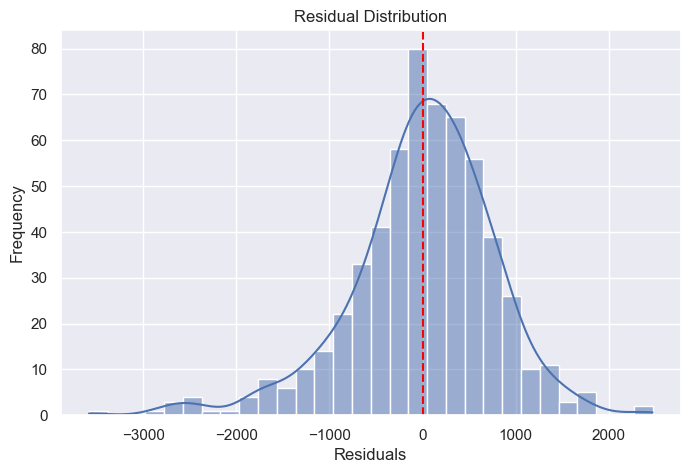

In [31]:
# Plot histogram of residuals
plt.figure(figsize=(8,5))
sns.histplot(residuals, kde=True, bins=30)
plt.axvline(0, color='red', linestyle='--')
plt.title("Residual Distribution")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()


#### Observation
- The residuals are fairly symmetrically distributed around zero, forming a bell-shaped curve. This is good sign

### Plot Residuals vs Predicted Values

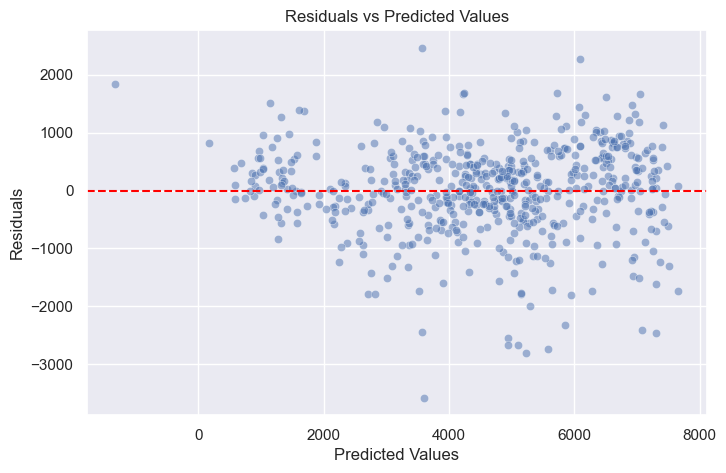

In [32]:
# Scatter plot of residuals vs predicted values
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_train_pred, y=residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs Predicted Values")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()


#### Observations
- The residuals appear to be randomly scattered around the zero line. No Clear Trend which is a good sign.

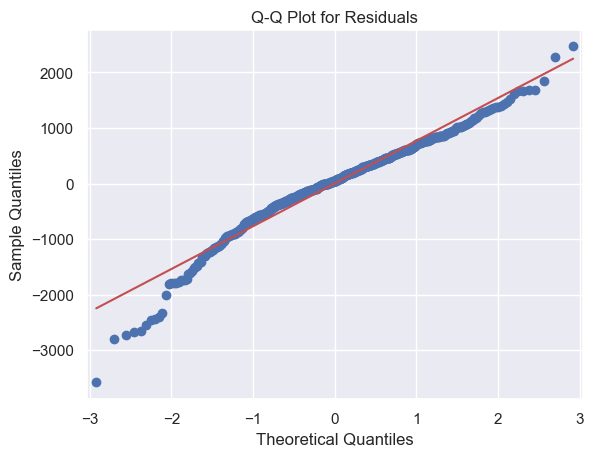

In [33]:
# Q-Q Plot for Normality Check
sm.qqplot(residuals, line='s')
plt.title("Q-Q Plot for Residuals")
plt.show()


#### Observation
- The majority of points fall along the 45-degree red line, indicating that residuals are roughly normally distributed in the central range
- Left tail (lower quantiles): Residuals deviate below the red line. Right tail (higher quantiles): Residuals deviate above the red line.This suggests the presence of slight skewness in the residual distribution

### Step 7: Model Evaluation

In [37]:
# Ensure X_test_selected has the same columns as X_train_selected
print(X_train_selected.columns)
print(X_test_selected.columns)  # 

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_1', 'season_3',
       'weathersit_1', 'weathersit_2', 'mnth_2', 'mnth_4', 'mnth_5', 'mnth_9',
       'mnth_11'],
      dtype='object')
Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_1', 'season_3',
       'weathersit_1', 'weathersit_2', 'mnth_2', 'mnth_4', 'mnth_5', 'mnth_9',
       'mnth_11'],
      dtype='object')


##### Both Train and Test dataset are matching exactly

In [38]:
# Verify model training before prediction
print(ols_model_updated.summary())  # Should display trained model summary


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     210.4
Date:                Tue, 25 Feb 2025   Prob (F-statistic):          1.05e-211
Time:                        22:03:24   Log-Likelihood:                -4613.1
No. Observations:                 572   AIC:                             9256.
Df Residuals:                     557   BIC:                             9321.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2944.6741    229.339     12.840   

In [40]:
# Check for shape mismatches
print(X_train_selected.shape)  # Shape used for training
print(X_test_selected.shape)   # Should match in column count


(572, 14)
(144, 14)


In [41]:
# Step 1: Add constant to X_test before predicting (same as train)
X_test_selected_const = sm.add_constant(X_test_selected)

# Step 2: Predict on test data using trained model
y_test_pred = ols_model_updated.predict(X_test_selected_const)

# Step 3: Compute residuals for test data
test_residuals = y_test - y_test_pred

# Step 4: Display results
print(test_residuals.head())  # Show first few residuals


125    762.184658
337    130.291135
39     600.707930
648    912.757963
526     90.769871
dtype: float64


### Calculate Model Performance Metrics

In [48]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Compute performance metrics
mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_test_pred)

# Display results in a detailed format
print("Model Performance Metrics on Test Data")
print("-" * 50)
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score (R-squared): {r2:.4f}")
print("-" * 50)

Model Performance Metrics on Test Data
--------------------------------------------------
Mean Absolute Error (MAE): 575.75
Mean Squared Error (MSE): 628719.15
Root Mean Squared Error (RMSE): 792.92
R² Score (R-squared): 0.8307
--------------------------------------------------


#### Observation
- Model is performing well (R² = 0.83) but has some room for improvement. This is a strong R² value, indicating that the model does a good job at capturing the relationship between features and the target variable.
- Errors (MAE & RMSE) suggest that some predictions are quite off. Mean Absolute Error (MAE) is 575.75, which means 12.8% of the actual bike rental count. This is moderate—not extremely high, but there is room for improvement.


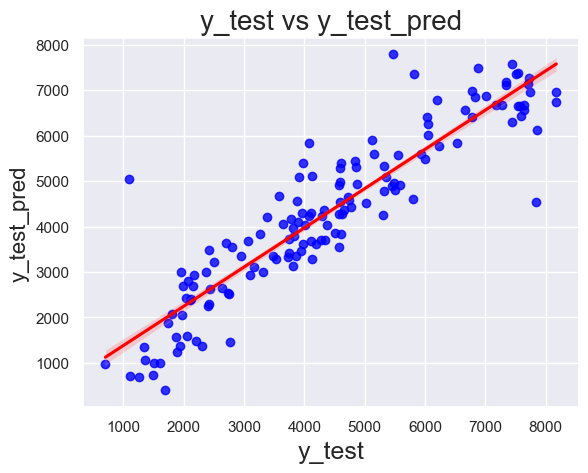

In [47]:
# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_test_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_test_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_test_pred', fontsize=16)
plt.show()

### Create function to calculate Adjusted R², Number of observations and predictors, Calculate Adjusted R² for Train and Test datasets

In [45]:
def adjusted_r2(r2, n, p):
    """
    Function to calculate Adjusted R-Squared.
    r2: R-squared value
    n: Number of observations
    p: Number of predictors (independent variables)
    """
    return 1 - ((1 - r2) * (n - 1) / (n - p - 1))

# Get the number of observations and predictors for the dataset
n, p = X_train_selected.shape

# Calculate Adjusted R²
adj_r2 = adjusted_r2(r2, n, p)

# Display Results
print("Model Performance Metrics:")
print(f"Number of Predictors: {p}")
print(f"Dataset - Observations: {n}, Adjusted R²: {adj_r2:.4f}")


Model Performance Metrics:
Number of Predictors: 14
Dataset - Observations: 572, Adjusted R²: 0.8265


In [46]:
# Function to calculate Adjusted R²
def adjusted_r2(r2, n, p):
    return 1 - ((1 - r2) * (n - 1) / (n - p - 1))

# Get R² score for the test dataset
r2_test = r2_score(y_test, y_test_pred)

# Get number of observations and predictors for the test dataset
n_test, p_test = X_test_selected.shape

# Compute Adjusted R² for test dataset
adj_r2_test = adjusted_r2(r2_test, n_test, p_test)

# Display Results
print("Model Performance Metrics (Test Data):")
print(f"Number of Predictors: {p_test}")
print(f"Test Dataset - Observations: {n_test}, Adjusted R²: {adj_r2_test:.4f}")


Model Performance Metrics (Test Data):
Number of Predictors: 14
Test Dataset - Observations: 144, Adjusted R²: 0.8124


#### Analysis of Train vs. Test Adjusted R²:
|Dataset|Adjusted R2|
| ------ | -------- |
|Train (572 obs) |0.8265|
|Test (144 obs) |0.8124|

- No significant performance drop between train and test sets
- The small difference indicates that the model is generalizing well and is not overfitting

### Step 8: Business Model Equation

Using the coefficients from your OLS summary:

cnt = 2944.6741 + (2020.5718 * yr) + (−613.4022 * holiday) + (3648.2770 * temp) + (−1111.9542 * hum) + (−844.0573 * windspeed) + (−1073.1758 * season1) + (684.8661 * season3) + ( −2011.6630 * weathersit1) + (−443.7001 * weathersit2) + (−556.3647 * mnth2) + (−325.4430 * mnth4) + (−612.9863 * mnth5) + (−633.7401 * mnth9) + (501.2331 * mnth11)


### Conclussion

##### **Demand of bikes depend on year, holiday, temp, windspeed, sep, Light_snowrain, Misty, spring, summer and winter**

- Temperature (temp) has the strongest positive impact.
- Humidity (hum) and Windspeed (windspeed) negatively impact rentals: which means Higher humidity and wind speed reduce bike demand
- Season and Weather Conditions Matter: Spring (season_1) reduces rentals (-1073), but Fall (season_3) increases them (+684). Clear weather (weathersit_1) has a strong negative impact (-2011 rentals).
- Month-wise trends: November (mnth_11) increases rentals (+501), while months like April (mnth_4), May (mnth_5), and September (mnth_9) show declines.

**Overall we have a decent model, but we also acknowledge that we could do better.**
- We have couple of options:
    1. Feature selection refinement to remove any redundant predictors
    2. Build a non-linear model